In [10]:
library(ggplot2)
library(Hmisc)

# Exercise 1 #

• Considering the following to sets of observations taken over a fixed large time interval in two different
corps:

| $y$ death soldiers | 0 | 1 | 2 | 3 | 4 | $\geq 5$ |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| $n_{1}$ observations | 109 | 65 | 22 | 3 | 1 | 0 |
| $n_{2}$ observations | 144 | 91 | 32 | 11 | 2 | 0 |

(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over
the measurement time. Determine the posterior mean, median and variance, and compute the 95%
credibility interval.

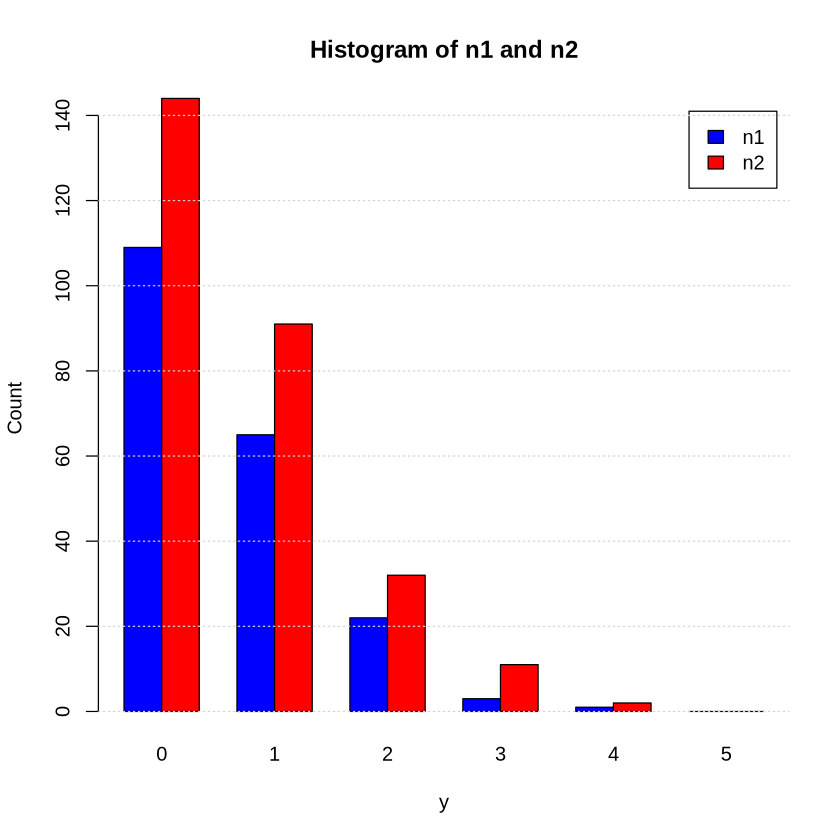

In [4]:
y <- c(0, 1, 2, 3, 4, 5)
n1 <- c(109, 65, 22, 3, 1, 0)
n2 <- c(144, 91, 32, 11, 2, 0)
n <- n1 + n2

space <- seq(0, 1.5, 0.01) # valori molto indicativi del parametro lambda, poi si mettono a posto vedendo come vengono i risultati

counts <- rbind(n1, n2)

barplot(counts, beside = TRUE, names.arg = y, col = c("blue", "red"),
        legend = c("n1", "n2"), xlab = "y", ylab = "Count", 
        main = "Histogram of n1 and n2")

grid(nx = NA, ny = NULL)

We can define the success condition as the no death condition. Therefore, the probability of observing n[0] successes is binomial process, where the probability OF THE SINGLE PROCESS is poissonian.

[1]  0 65 44  9  4  0
[1] 200


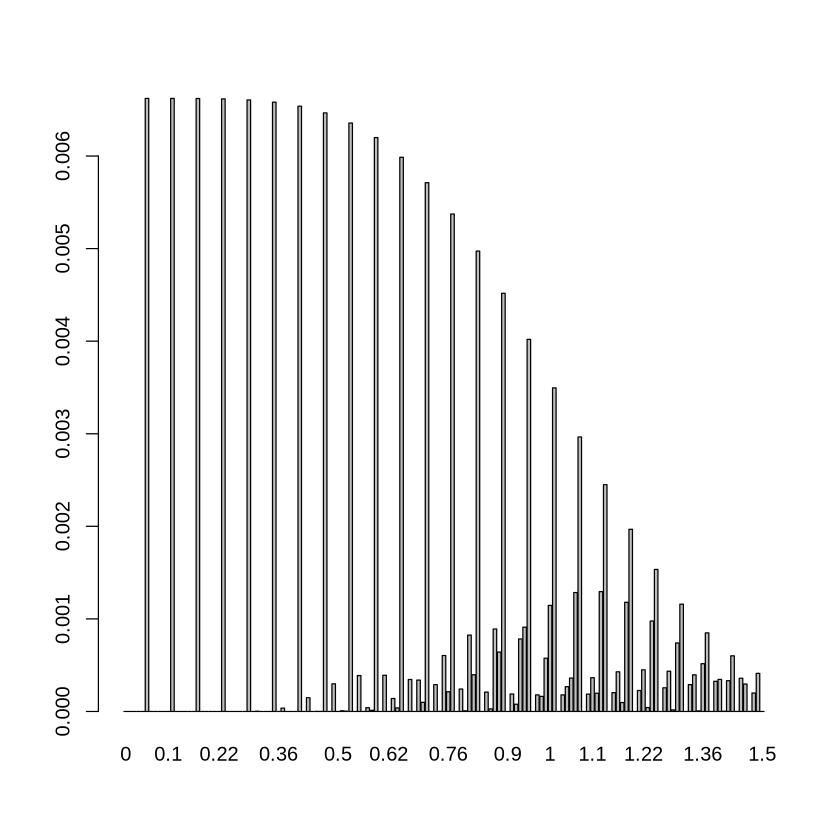

In [6]:
r <- n1 * y # number of successes
s <- sum(n1) # total observations
print(r)
print(s)

#length(space)
#length(y)
prob <- dpois(y, space)
#length(prob)
#print(prob)
likelihood <- dbinom(r, s, prob)
#print(likelihood)
prior <- replicate(length(space), 1 / length(space))

posterior <- prior * likelihood
#print(posterior)

data <- data.frame(space = space, posterior = posterior)

barplot(posterior, names.arg = space)


  [1]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [6]  0.000000e+00  0.000000e+00  9.740279e-77  0.000000e+00  0.000000e+00
 [11]  0.000000e+00  0.000000e+00  0.000000e+00  3.457131e-16  0.000000e+00
 [16]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.057611e-01
 [21]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [26]  3.008495e-04 2.753963e-225  0.000000e+00  0.000000e+00  0.000000e+00
 [31]  0.000000e+00  4.452061e-15 3.433369e-163  0.000000e+00  0.000000e+00
 [36]  0.000000e+00  0.000000e+00  1.841969e-29 2.450086e-117  0.000000e+00
 [41]  0.000000e+00  0.000000e+00  0.000000e+00  5.194773e-45  4.867892e-83
 [46]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.450352e-60
 [51]  2.456311e-57  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [56]  1.324891e-74  3.227100e-38  0.000000e+00  0.000000e+00  0.000000e+00
 [61]  0.000000e+00  2.581106e-87  3.055182e-24 1.248176e-254  0.000000e+00
 [66]  0.000

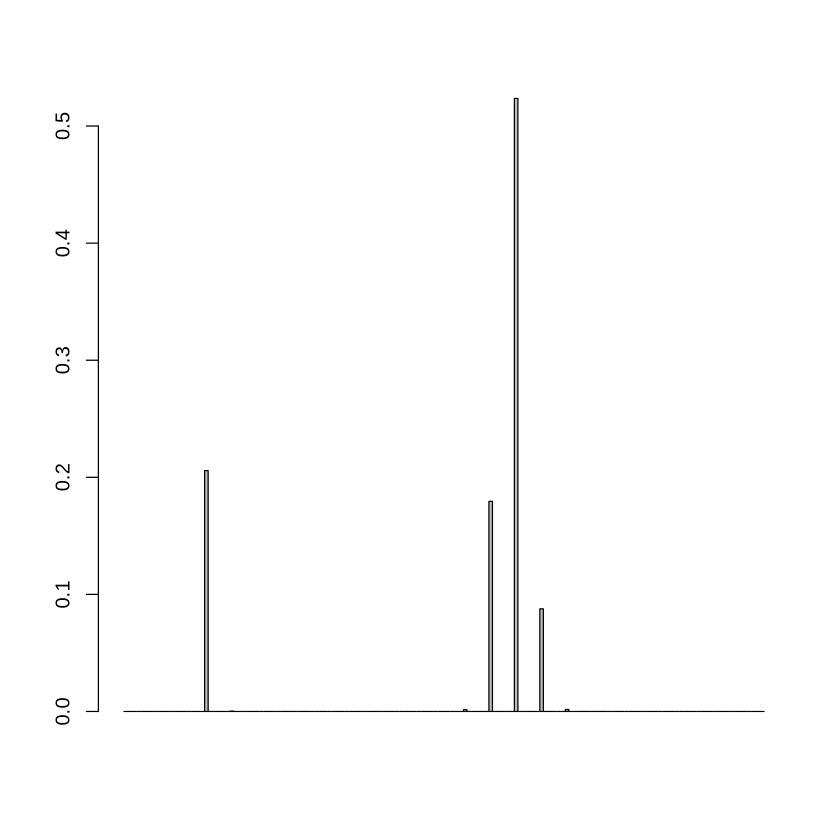

In [13]:
prior <- replicate(length(space), 1 / length(space))
prior <- prior / sum(prior)

for (i in 1:length(y)) {
    likelihood <- dbinom(n1[i], sum(n1), prob)
    posterior <- prior * likelihood / sum(prior * likelihood)
    prior <- posterior
}
for (i in 1:length(y)) {
    likelihood <- dbinom(n2[i], sum(n2), prob)
    posterior <- prior * likelihood / sum(prior * likelihood)
    prior <- posterior
}
barplot(posterior)
print(posterior)
mean = wtd.mean(posterior)
print(mean)